# Orthogonalizing a large mesh

This is an example of loading and orthogonalizing a large mesh2d. At the very beginning, the necessary libraries have to be imported. In this example we also use the UGrid library for loading the mesh2d correctly 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from meshkernel import GeometryList, MeshKernel, OrthogonalizationParameters, ProjectionType, Mesh2d
from ugrid import UGrid, UGridMesh2D

Define an orthogonality threshold and the file names

In [2]:
orthogonality_criteria = 0.3
input_file = "./Michigan_Huron_ORTHO_mc025_mn5_net.nc"
output_file = "./Michigan_Huron_orthogonality_issues.xyz"

Read the mesh geometry

In [3]:
with UGrid(input_file, "r") as ug:
    num_mesh2d_topologies = ug.mesh2d_get_num_topologies()
    mesh2d_ugrid = ug.mesh2d_get(num_mesh2d_topologies - 1)

Create a meshkernel mesh2d from the nodes and edges

In [4]:
mesh2d_mk = Mesh2d()
mesh2d_mk.node_x = mesh2d_ugrid.node_x
mesh2d_mk.node_y = mesh2d_ugrid.node_y
mesh2d_mk.edge_nodes = mesh2d_ugrid.edge_nodes

Create a meshkernel instance 

In [5]:
mk = MeshKernel(ProjectionType.SPHERICAL)

Set the mesh (expensive call)

In [6]:
mk.mesh2d_set(mesh2d_mk)

Get the mesh

In [7]:
mesh2d_output = mk.mesh2d_get()

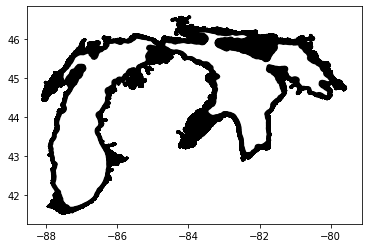

In [8]:
fig, ax = plt.subplots()
mesh2d_output.plot_edges(ax, color="black")

Inquire orthogonality (expensive call)

In [9]:
orthogonality = mk.mesh2d_get_orthogonality().values

Extract edges with orthogonality value above the orthogonality_criteria

In [10]:
criteria_indices = np.where(orthogonality > orthogonality_criteria)[0]

Save the extracted edges to file

In [11]:
xyz_df = pd.DataFrame([])
xyz_df['edge_x'] = mesh2d_output.edge_x[criteria_indices]
xyz_df['edge_y'] = mesh2d_output.edge_y[criteria_indices]
xyz_df['orthogonality'] = orthogonality[criteria_indices]
xyz_df.to_csv(output_file,index=False,header=False,sep=' ')

## Orthogonalizing 

In [12]:
selecting_polygon = GeometryList(np.empty(0, dtype=np.double), np.empty(0, dtype=np.double))
land_boundaries = GeometryList(np.empty(0, dtype=np.double), np.empty(0, dtype=np.double))

In [13]:
mk.mesh2d_compute_orthogonalization(project_to_land_boundary_option=0,
                                    orthogonalization_parameters=OrthogonalizationParameters(outer_iterations=1),
                                    selecting_polygon=selecting_polygon,
                                    land_boundaries=land_boundaries)